<a href="https://colab.research.google.com/github/LucasRobles2323/ADA-Informes/blob/main/Informe3-SubArregloM%C3%A1ximo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema del Subarreglo Máximo**

**Entrada:** El programa recibe una secuencia de $n$ números arreglo en un orden aleatoria con elementos enteros de la manera **A**$=[a_1, a_2, ..., a_n]$.

**Salida:** El programa retorna la secuencia de $n$ o menos números de la manera $[a_i, a_{i+1}, a_{i+2},...,a_j]$ tal que $1 \leq i \leq j \leq n$. Y la suma ${\displaystyle \sum _{x=i}^{j}A[x]}$  sea la mayor entre elementos contiguos del arreglo **A**.

El problema del **Subarreglo Máximo** se puede resolver utilizando varias técnicas algorítmicas diferentes, incluida la fuerza bruta, divide y vencerás, la programación dinámica, y la reducción a los caminos más cortos.

Este problema fue propuesto como un modelo simplificado para la estimación de máxima verosimilitud de patrones en imágenes digitalizadas por **Ulf Grenander** en 1977.


### Ejemplo

![SubArrMax](https://media.geeksforgeeks.org/wp-content/uploads/maximum-subarray-sum-is-7.jpg) 
By: https://es.acervolima.com/suma-maxima-de-subarreglos-en-o-n-usando-la-suma-de-prefijo/

#### **Arreglo Inicial:**  $[-2, -3, 4, -1, -2, 1, 5, -3]$


#### **Subarreglo maximo:**  $[4, -1, -2, 1, 5]$ **con suma:**  $7$

### Aplicaciones

Los problemas de subarreglo máximo surgen en muchos campos, como el análisis de secuencias genómicas y la visión por computadora .

El análisis de secuencias genómicas emplea algoritmos de subarreglo máximo para identificar segmentos biológicos importantes de secuencias de proteínas. Estos problemas incluyen segmentos conservados, regiones ricas en GC, repeticiones en tándem, filtro de baja complejidad, dominios de unión al ADN y regiones de alta carga.

En visión artificial , los algoritmos de subarreglo máximo se utilizan en imágenes de mapa de bits para detectar el área más brillante de una imagen.

# **2. Subarreglo Máximo** (Divide y Vencerás)

## **2.1. Descripción del algoritmo**

La tarea es encontrar el subarreglo máximo dentro de un arreglo, es decir, un subarreglos con elementos contiguos del arreglo que la suma de sus elementos sea mayor a la suma de los elementos del arreglo y de cualquier subarreglo posible con sus elementos.

Por ejemplo, para el conjunto de valores [−2, 1, −3, 4, −1, 2, 1, −5, 4], el subarreglo contiguo con la suma más grande es [4, −1, 2, 1] , con suma 6.

El algoritmo recibe de entrada una lista(o arreglo) $arr$ con una secuencia de $n$ números en cualquier orden. 

Luego los números dentro de la lista(o arreglo) se ordenan de mayor a menor o de menor a mayor dependiendo del programador. En este caso describiremos la técnica algorítmica de divide y vencerás con `MaxSubArray` para solucionar el algoritmo.

1.   En cada interacción i del algoritmo, se calculará la mitad del arreglo para dividirlo en dos subarreglos, que, para obtener el máximo subarreglo posible de formar dentro del arreglo enviado, se enviaran a la función `MaxSubArray`.

2.   Una vez obtenido con `MaxSubArray` el subarreglo máximo de la mitad izquierda y derecha del arreglo, se usara la función `MaxSubArrayMid` para conseguir el subarreglo máximo que contenga el elemento en la mitad del arreglo.

3.   Una vez obtenido los 3 subarreglos máximo de las partes izquierda, derecha y mitad del arreglo, se evaluara cual suma es mayor. `MaxSubArray` retorba el subarreglo máximo entre los 3 subarreglos.

## **2.2. Código**

In [3]:
import random
from termcolor import colored
import copy

comparaciones = 0; iteraciones = 1

def MaxSubArrayMid(arr, izq, med, der, verbose=False):
    global iteraciones
    if verbose == True: 
        print(f"**************** Iteracion {iteraciones} **********************")
        iteraciones += 1
        print(f"Recibido el arreglo {a[izq:der+1]}")
        print(f"Se debe encontrar el subarreglo maximo que contenga array[{med}]= {arr[med]}")
    sum = 0
    izq_sum = -10000
    izq_index = -1
    global comparaciones

    if verbose == True: print("--------------------------------------")
    if verbose == True: print(f"El subarreglo izquierdo es {a[izq: med+1]}")
    for i in range(med, izq-1, -1):
        comparaciones+=1
        sum = sum + arr[i]
        if verbose == True: print(f"     Para el subarreglo {a[i:med+1]} su suma es = {sum}")
        if (sum > izq_sum):
            izq_sum = sum
            izq_index = i
    if verbose == True: print(f"Y suu subarreglo maximo es {a[izq_index:med+1]} y su suma es = {izq_sum}")
 
    sum = 0
    der_sum = -10000
    der_index = -1
    if verbose == True: print("--------------------------------------")
    if verbose == True: print(f"El subarreglo derecho es {a[med: der+1]}")
    for i in range(med, der + 1):
        comparaciones+=1
        sum = sum + arr[i]
        if verbose == True: print(f"     Para el subarreglo {a[med:i+1]} su suma es = {sum}")
        if (sum > der_sum):
            der_sum = sum
            der_index = i
    if verbose == True: print(f"Y su subarreglo maximo es {a[med:der_index+1]} y su suma es = {der_sum}")
    
    med_sum = izq_sum + der_sum - arr[med]
    if verbose == True: print("--------------------------------------")
    if verbose == True: print(f"El subarreglo maximo de en medio es {a[izq_index:der_index+1]} y su suma es = {med_sum}")

    comparaciones-=1 ## Com la mitad esta en los 2 for, hay una comparacion que se repite
    
    if verbose == True: print("--------------------------------------")
    if verbose == True: 
        print(f"Entre los 3 subarreglos {a[izq_index:med+1]}={izq_sum} -- {a[med:der_index+1]}={der_sum} -- {a[izq_index:der_index+1]}={med_sum}")
    if(med_sum > der_sum and med_sum > izq_sum): 
          if verbose == True: print(f"El subarreglo mayor es {a[izq_index:der_index+1]}={med_sum}")
          if verbose == True: print("--------------------------------------")
          if verbose == True: print("****************************************************\n")
          return (izq_index, der_index, med_sum)
    elif (der_sum > izq_sum):
          if verbose == True: print(f"El subarreglo mayor es {a[med:der_index+1]}={der_sum}")
          if verbose == True: print("--------------------------------------")
          if verbose == True: print("****************************************************\n")
          return (med , der_index, der_sum)
    else: 
          if verbose == True: print(f"El subarreglo mayor es {a[izq_index:med+1]}={izq_sum}")
          if verbose == True: print("--------------------------------------")
          if verbose == True: print("****************************************************\n")
          return (izq_index, med, (izq_sum))
    
    

def MaxSubArray(arr, izq, der, verbose=False):
      if izq == der: return (izq, der, arr[izq])
      med = (izq + der) // 2 
      
      (izq_start, izq_finish, izq_sum) = MaxSubArray(arr, izq, med, verbose)
      (der_start, der_finish, der_sum) = MaxSubArray(arr, med+1, der, verbose)
      (med_start, med_finish, med_sum) = MaxSubArrayMid(arr, izq, med, der, verbose)

      if der_sum > izq_sum and der_sum > med_sum: return (der_start, der_finish, der_sum)
      elif izq_sum > med_sum and izq_sum > der_sum: return (izq_start, izq_finish, izq_sum)
      else : return (med_start, med_finish, med_sum)

a = random.sample(range(-100, 100), 7)
print(f"Arreglo Inicial: {a} \n")
(inicio, final, suma) = MaxSubArray(a, 0, len(a)-1)
print("Subarreglo maximo: ", a[inicio:final+1], "Y la suma es: ", suma )

Arreglo Inicial: [96, 46, -35, 1, -48, 42, -3] 

Subarreglo maximo:  [96, 46] Y la suma es:  142


## **2.3. Ejemplo**

Por ejemplo, consideremos el siguiente arreglo

*Entrada:* **a** = $[-1,2,-6]$

* 1. Llamando al **MaxSubArray**, recibe el arreglo **A**=$[-1,2,-6]$. como tiene más de 1 elemento, se llama nuevamente a  **MaxSubArray** enviando la mitad izquierda del arreglo, es decir,**A** = $[-1,2]$ se envia a **MaxSubArray**.

* 2. **MaxSubArray** recibe el arreglo **A**=$[-1,2]$. Como tiene más de 1 elemento, se llama nuevamente a **MaxSubArray** enviando la mitad izquierda del arreglo, es decir,**A** = $[-1]$ a **MaxSubArray**.

* 3. **MaxSubArray** recibe el arreglo **A**=$[-1]$. Como **A** solo tiene 1 elemento, retorna el arreglo, ya que es su propio subarreglo máximo.

* 2. Como al enviar la mitad izquierda del algoritmo (**A** = $[-1]$) retorno, ahora se enviará la mitad derecha, es decir, **A** = $[2]$ a **MaxSubArray**.

* 3. **MaxSubArray** recibe el arreglo **A**=$[2]$. Como **A** solo tiene 1 elemento, retorna el arreglo, ya que es su propio subarreglo máximo.

* 2. Ahora que **MaxSubArray** recibio los subarreglos maximos de la mitad izquierda y derecha ($subA_{izq} = [-1]$ y $subA_{der} = [2]$), debe conseguir el subarreglo máximo que contenga el elemento en la mitad del arreglo, por eso envia el arreglo (**A** = $[-1,2]$) a la función **MaxSubArrayMid**.

* 3. **MaxSubArrayMid** recibe el arreglo **A**=$[-1,2]$, consigue 3 subarreglos maximos que contienen el elemento de la mitad del arreglo, $subA_{izq} = [-1]$;$subA_{der} = [-1,2]$; $subA_{med} = [-1,2]$. 

* 3. Consigue sus sumas $subA_{izq}Suma = -1$;$subA_{der}Suma = 1$; $subA_{med}Suma = 1$ y retorna los indices y la suma del subarreglo máximo de entre los 3 (como en este caso der y med son lo mismo, no importa cual de los 2 retorne)

* 2. Como finalizo el **MaxSubArrayMid** dentro del **MaxSubArray**, quiere decir que el arreglo recibido $subA_{med} = [-1,2]$ es el de enmedio maximo, el $sub_A{izq} = [-1]$ es el izquierdo maximo y $subA_{der} = [2]$. Se selecciona cual tiene una suma mayor al sumar sus elementos. En este caso, el subarreglo mayor es $subA_{der} = [2]$, por eso **MaxSubArray** retornara sus indices y su suma.

* 1. Como al enviar la mitad izquierda del algoritmo (**A** = $[-1,2]$) retorno su subarreglo máximo ($subA_{izq} = [2]$), ahora se enviará la mitad derecha, es decir, **A** = $[-6]$ a **MaxSubArray**.

* 2. **MaxSubArray** recibe el arreglo **A**=$[-6]$. Como **A** solo tiene 1 elemento, retorna el arreglo, ya que es su propio subarreglo máximo.

* 1. Ahora que **MaxSubArray** recibio los subarreglos maximos de la mitad izquierda y derecha ($subA_{izq} = [2]$ y $subA_{der} = [-6]$), debe conseguir el subarreglo máximo que contenga el elemento en la mitad del arreglo, por eso envia el arreglo (**A** = $[-1,2,-6]$) a la función **MaxSubArrayMid**.

* 2. **MaxSubArrayMid** recibe el arreglo **A**=$[-1,2,-6]$, consigue 3 subarreglos maximos que contienen el elemento de la mitad del arreglo, $subA_{izq} = [-1,2]$;$subA_{der} = [2,-6]$; $subA_{med} = [-1,2,-6]$.

* 2. Consigue sus sumas $subA_{izq}Suma = 1$;$subA_{der}Suma = -4$; $subA_{med}Suma = -5$ y retorna los indices y la suma del subarreglo máximo de entre los 3, en este caso retorna el $subA_{izq} = [-1,2]$.

* 1. Como finalizo el **MaxSubArrayMid** dentro del **MaxSubArray**, quiere decir que el arreglo recibido $subA_{med} = [-1,2]$ es el de enmedio maximo, el $sub_A{izq} = [2]$ es el izquierdo maximo y $subA_{der} = [-6]$. Se selecciona cual tiene una suma mayor al sumar sus elementos. En este caso, el subarreglo mayor es $subA_{izq} = [2]$, por eso **MaxSubArray** retornara sus indices y su suma.

*Salida:* **A** = $[2]$ y su suma es $2$


## **2.4. Ejecución del algoritmo paso a paso**

Aplicando **`verbose=True`**, podemos ver lo que ocurre en cada iteración del algoritmo de Insertion Sort.

In [ ]:
import random
comparaciones = 0; iteraciones = 1
a = random.sample(range(-100, 100), 12)
print(f"Arreglo Inicial: {a} \n")
(inicio, final, suma) = MaxSubArray(a, 0, len(a)-1, True)
print("Subarreglo maximo: ", a[inicio:final+1], "Y la suma es: ", suma )

Arreglo Inicial: [-70, -11, 68, -2, 29, 23, 40, 7, -1, -79, -91, 70] 

**************** Iteracion 1 **********************
Recibido el arreglo [-70, -11]
Se debe encontrar el subarreglo maximo que contenga array[0]= -70
--------------------------------------
El subarreglo izquierdo es [-70]
     Para el subarreglo [-70] su suma es = -70
Y suu subarreglo maximo es [-70] y su suma es = -70
--------------------------------------
El subarreglo derecho es [-70, -11]
     Para el subarreglo [-70] su suma es = -70
     Para el subarreglo [-70, -11] su suma es = -81
Y su subarreglo maximo es [-70] y su suma es = -70
--------------------------------------
El subarreglo maximo de en medio es [-70] y su suma es = -70
--------------------------------------
Entre los 3 subarreglos [-70]=-70 -- [-70]=-70 -- [-70]=-70
El subarreglo mayor es [-70]=-70
--------------------------------------
****************************************************

**************** Iteracion 2 **********************
Recibid

Al final de cada pasada iteracion, se identifico correctamente el subarreglo mayor que contiene el elemento de la mitad del arreglo.

# **3. Correctitud**

## MaxSubArrayMid

### **Teorema (Correctitud).**

*La función **MaxSubArrayMid** dentro del código **MaxSubArray** recibe el arreglo $A=[a_1,a_2,...,a_n]$ sin un orden especifico.*

*Esta función se encarga de encontrar el subarreglo máximo $B=[a_i,a_{i+1}, a_{i+2},...,a_j]$ tal que $1 \leq i \leq j \leq n$ con i,j constantes.*

*Y teniendo $1 \leq k \leq l \leq n$ siempre debe cumplirse ${\displaystyle \sum _{x=k}^{l}A[x]} \leq {\displaystyle \sum _{x=i}^{j}A[x]}$.*

### **Prueba del Teorema**

Probaremos la siguiente **propiedad invariante de bucle** para la función `MaxSubArrayMid`:

> Al finalizar de cada iteración $i$ del bucle, el subarreglo máximo retornado contendrá entre sus elementos el elemento que se encuentra en la mitad del arreglo recibido.

####**Inicialización**

La función `MaxSubArrayMid` recibe el arreglo **A**$=[a_1, ..., a_n]$ donde $n=2$ en su primera iteración.

El arreglo solo contiene $2$ elementos, la mitad del arreglo seria la posición $med=0$. 

En este caso la suma del subarreglo izquierdo (incluyendo el elemento de la mitad) seria $izq_{sum} = A[med]$, mientras que la suma del subarreglo derecho (incluyendo el elemento de la mitad) seria $der_{sum} = A[med] + A[med+1]$.

La suma del el medio siempre será $izq_{sum} + der_{sum} - A[med]$ se le resta el elemento de la mitad porque ambas sumas lo contienen. En este caso el subarreglo derecho es el mismo que el subarreglo con la mitad, es decir, $B=[A[0], A[1]]$.

> Si los elementos en  el arreglo recibido son positivos, `MaxSubArrayMid` retorna el arreglo original (su suma e índices), ya que su suma seria la mayor. Podría retornar el subarreglo derecho o el del medio ya que son lo mismo en este caso.

> Si el elementos $A[0]$ es el único positivo del array, entonces retornara el subarreglo izquierdo (su suma e índices).

> Si el arreglo contiene solo elementos negativos, entonces retornara el subarreglo izquierdo (su suma e índices), ya que su suma será menor a la suma de $A[0] + A[1]$ en el caso de que ambos sean negativos.

#### **Mantención**

`MaxSubArrayMid` recibe el arreglo **A**$=[a_1, ..., a_n]$ donde $n=4$.

El arreglo contiene $4$ elementos, la mitad del arreglo seria la posición $med=1$. En este caso tenemos lo siguiente:

La suma del subarreglo izquierdo (incluyendo el elemento de la mitad) seria $(izq_{sum} = \displaystyle \sum _{k=i}^{med} A[k])$ **con** $(izq \leq i \leq med)$. El subarreglo izquierdo seria $B = [b_i, b_{i+1}, ..., b_med]$.

La suma del subarreglo derecho (incluyendo el elemento de la mitad) seria $(der_{sum} = \displaystyle \sum _{k=med}^{j} A[k])$ **con** $(med \leq j \leq der)$. El subarreglo izquierdo seria $B = [c_med, ..., c_{j-1}, c_j]$.

La suma del el subarreglo de en medio siempre será $izq_{sum} + der_{sum} - A[med]$ y el subarreglo del medio siempre sera $A[i:j+1]$.

> Si $izq_{sum} > 0$ **y** $der_{sum} > 0$ , entonces `MaxSubArrayMid` retorna el subarreglo de en medio (su suma e índices), ya que su suma seria la mayor.

> Si $izq_{sum} < 0$ **y** $der_{sum} > 0$, entonces `MaxSubArrayMid` retorna el subarreglo de la derecha (su suma e índices), ya que su suma seria la mayor.

> Si $izq_{sum} > 0$ **y** $der_{sum} < 0$, entonces `MaxSubArrayMid` retorna el subarreglo de la izquierda (su suma e índices), ya que su suma seria la mayor.

> Si $izq_{sum} < 0$ **y** $der_{sum} > 0$, entonces `MaxSubArrayMid`:
  * Si $izq_{sum} > der_{sum}$, retorna el subarreglo de la izquierda (su suma e índices), ya que su suma seria la mayor.
  * Si $der_{sum} > izq_{sum}$, retorna el subarreglo de la derecha (su suma e índices), ya que su suma seria la mayor.

#### **Correctitud**

La correctitud del `MaxSubArrayMid` es evidente, ya que a pesar de que enviara uno de 3 subarreglos que crea la función, el elemento de la mitad del arreglo siempre se encontrara en los 3 subarreglos, `MaxSubArrayMid` está diseñado para que asi sea, e independientemente del subarreglo retornado, siempre contendrá el elemento de la mitad del arreglo recibido.

## MaxSubArray

### **Teorema (Correctitud).**

* El algoritmo **MaxSubArray** genera un arreglo: $[a_{i},a_{i+1},...,a_j]$ siendo $1 \leq i \leq j \leq n$, con los elementos contiguos que sumados dan el mayor numero posible con los elementos del arreglo $[a_{1},a_{2},...,a_n]$ recibido.

### **Prueba del Teorema**

Para probar la correctitud de **MaxSubArray** usaremos **inducción matemática** debido a la recursividad del algoritmo.

> En **inducción matemática,** para probar una declaración $P(n)$, para todos los números naturales $n$, típicamente debemos:
  1. Probar $P(n)$ para un **caso base**, por ejemplo $P(1)$
  2. Probar que si $P(m)$ es cierto para $m < n$, entonces $P(n)$ también lo es.

Nuestro teorema dice que $MaxSubArray$ retorna el máximo subarreglo posible de formar con elementos contiguos de la secuencia de **n** elementos de entrada.


#### **Caso Base**

Probemos como caso base $P(1)$.

Cuando **MaxSubArray** recibe una secuencia de 1 elementos, la retorna inmediatamente. Podemos comprobar que el teorema efectivamente se cumple en este caso, ya que, si solo se tiene 1 elemento en la secuencia, el subarreglo máximo es el único elemento de la secuencia.

#### **Caso cualquiera**

Probemos como caso cualquiera $P(n)$.

Para una secuencia de **n** elementos, **MaxSubArray** divide el arreglo en 2 subarreglos de secuencias $m$ y $p$, tal que $m=\frac{n}{2}$ y $p=\frac{n}{2}$, y consigue los subarreglos máximos de cada subarreglo formado usando **MaxSubArray** `(debido a esta recursividad, llegará el momento en que se aplique MaxSubArray en el caso base, donde retornará correctamente un subarreglo máximo de 1 elemento)`. Como $m < n$ y $p < n$ podemos asumir inductivamente que se encontrara los subarreglos máximos de ambas mitades inductivamente.

Luego se consigue un subarreglo máximo que contenga el elemento ubicado en la mitad del arreglo utilizando la función **MaxSubArrayMid**, cuya correctitud fue probada previamente y devuelve efectivamente el subarreglo máximo que es posible formar conteniendo el elemento en la mitad del arreglo.

Una vez obtenido 3 subarreglos máximos (los 2 de cada mitad y el que contiene el elemento en la mitad del arreglo) la función **MaxSubArray** decide y retorna el subarreglo cuya suma sea mayor.

Por lo tanto, la función **MaxSubArray** es correcta.


#### **Conclusión**

El teorema fue efectivamente comprobado como correcto para un caso base y para un caso cualquiera, es decir, el algoritmo **MaxSubArray**, al comprobarlo con inducción matemática es correcto.

# **4. Tiempo de ejecución**

### **Teorema (Tiempo de ejecución).**

*El algoritmo **MaxSubArray** presenta un caso peculiar. Tiene un **tiempo de ejecución de** $O(n*log_2(n))$ en todos sus casos, tanto en el peor como en su mejor caso.* 

### **Prueba del teorema.** (Árbol de recursión)

La complejidad temporal de la solución utilizada de divide y vencerás es $O(n*log(n))$ en cuanto al arreglo dado de tamaño $n$. Como este caso aplica "divide y vencerás" su complejidad debería ser la misma.

Para el arreglo hacemos dos llamadas recursivos en el tamaño de entrada n/2 y encontrar el subarreglo máximo que contenga el elemento de la mitad del arreglo toma O(n) tiempo en el peor de los casos. Por lo tanto,

$T(n) = 2T(n/2) + O(n)$.

Con esta fórmula se forma el siguiente árbol de recurrencia.

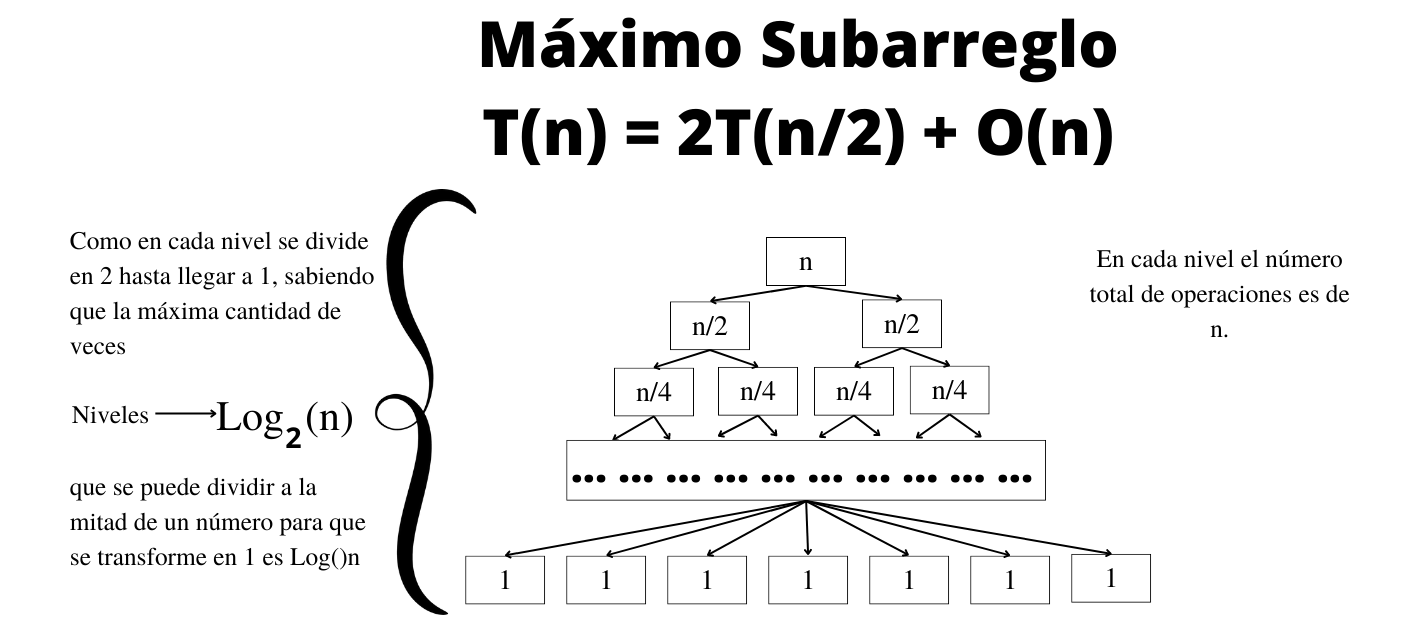
By: Lucas Robles with Canva: https://www.canva.com/design/DAFKiPBha60/pe82yWgxFk3JBu4NgKk3-w/view?utm_content=DAFKiPBha60&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

Se puede observar que la altura del árbol es $log_2(n)$ y cada nivel tiene una complejidad $n$, por eso la complejidad del problema entero seria multiplicar la complejidad de cada nivel por la altura del árbol(cantidad de niveles). Con esto queda demostrado que la complexidad del Máximo Subarreglo con la estrategia “divide y vencerás” es de $O(n*log(n))$.

# **5. Experimentos**

## **5.1. Subarreglo Máximo: Divide y Vencerás vs Kadane** (Tiempo de ejecución)

### **Kadane** (Codigo)

In [4]:
def maxSubArraySum(arr,size):
    sumaMax_actual = arr[0]
    suma_positiva = 0
    der = 0; izq = 0
    aux_allNegatives = arr[0]; pos_allNegatives = 0
    
    for i in range(0, size):
        if aux_allNegatives < arr[i] : aux_allNegatives= arr[i]; pos_allNegatives = i
        suma_positiva = suma_positiva + arr[i]
        if suma_positiva < 0:
            suma_positiva = 0
        elif (sumaMax_actual < suma_positiva):
            if suma_positiva == arr[i] : izq = i
            sumaMax_actual = suma_positiva
            der = i
    
    if aux_allNegatives <=0:
        return pos_allNegatives, pos_allNegatives, aux_allNegatives
    else :
        return izq, der, sumaMax_actual
        print(arr[izq:der+1])

a = [35, -87, -15, 73, 54, 60, 5]
print("Arreglo Inicial: ", a)
(inicio, final, suma) = maxSubArraySum(a, len(a))
print("Subarreglo maximo: ", a[inicio:final+1], "Y la suma es: ", suma )

Arreglo Inicial:  [35, -87, -15, 73, 54, 60, 5]
Subarreglo maximo:  [73, 54, 60, 5] Y la suma es:  192


### **Comparación de Gráficas** (Tiempo de ejecución)

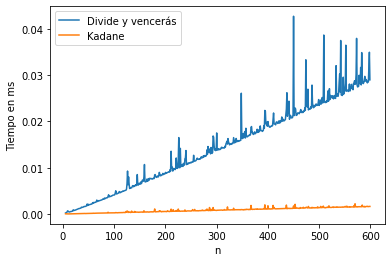

In [7]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; y1=[]

for n in range(5,600):
    a = random.sample(range(-100, 10000), n)

    comparaciones = 0; iteraciones = 1
    #la función repeat está ejecutando 10 veces MergeSort e insertionSort con el arreglo a y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({a},{0},{len(a)-1})", repeat=1, number=10)
    t1 = repeat(setup="from __main__ import maxSubArraySum", stmt=f"maxSubArraySum({a}, {len(a)})", repeat=1, number=10)

    x.append(n)
    y.append(t)
    y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Divide y vencerás", "Kadane"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**

Al comparar los tiempos de ejecución de **Divide y Vencerás** y **Kadane** para el algoritmo del **Subarreglo Máximo**, podemos apreciar que el algoritmo de $Kadane$ es más rápido que el algoritmo *Divide y Vencerás*.

Ambos algoritmos presentan la situación donde el mejor y peor caso teórico son lo mismo. La complejidad de **Divide y Vencerás** es $O(n * log(n))$ mientras que la complejidad de **Kadane** es $O(n)$. 

El algoritmo **Kadane** es el más rápido, y no es sorprendente pues se creó para optimizar el algoritmo del **Subarreglo Máximo**, ya que debido a sus aplicaciones puede llegar a trabajar con datos lo suficientemente grandes para que $O(n * log(n))$ de **Divide y Vencerás** se encuentre lento. Así que nació **Kadane** para una mejor eficiencia.

Puede que no sea mucho problema la diferencia en los conjunto de datos pequeños, pero mientras más grande es la secuencia de números r, más notable es esta diferencia de velocidad. Y el **Subarreglo Máximo** puede encontrarse conjunto de datos enormes en sus aplicaciones.

Esto puede deberse a la forma en que operan estos algoritmos:
* **Divide y Vencerás** generalmente tiene $O(n * log(n))$ de complejidad, ya que la división de la secuencia siempre dará $log(n)$ divisiones, y el proceso que se hace con cada división tiende a ser de complejidad $n$, por eso es de $O(n * log(n))$.
* **Kadane** no necesita más procesos que recorrer los elementos, es una forma eficiente donde se puede encontrar los datos necesarios recorriendo los elementos solo una vez, por eso su complejidad será siempre $O(n)$.

Note que hay unos peaks de tiempo. Estos se deben probablemente al comportamiento impredecible de los procesadores y quizás a otros procesos que también lo están ocupando. En el "divide y vencerás" estos peaks son mayores, en el tiempo de "Merge Sort" también existían peaks inusualmente grandes, tal vez python o el colab se comporten de manera extraña cuando se mide el tiempo de algoritmos "divide y vencerás".


## **5.2. Subarreglo Máximo(Divide y Vencerás) vs Merge Sort** (Comparaciones y Riempo de ejecución)

### **Merge Sort** (Codigo)

In [ ]:
import random
from termcolor import colored
import copy

llamadas = -1; contador = 0; pasada = 0; llamadasMerge = 0

def subArreglo(a,i):
    if len(a) == 1:
        print(colored(f"{str(a[i:i+1])[1:-1]}", "blue"))
    elif len(a) == 2:
        if i == 0:
           print(colored(f"{str(a[:1])[1:-1]}", "blue"), ",", str(a[1:])[1:-1])
        else :print(str(a[:1])[1:-1], ",",colored(f"{str(a[1:2])[1:-1]}", "blue"))
    elif len(a)>2:
        if i == 0:
           print(colored(f"{str(a[:1])[1:-1]}", "blue"), ",", str(a[1:])[1:-1])
        elif i+1==len(a) : print(str(a[:i])[1:-1], ",",colored(f"{str(a[i:i+1])[1:-1]}", "blue"))
        else: print(str(a[:i])[1:-1], ",",colored(f"{str(a[i:i+1])[1:-1]}", "blue"), ",",str(a[i+1:])[1:-1])

def Arreglo(a):
    if len(a) == 1:
        print(colored(f"{str(a[:1])[1:-1]}", "red"))
    elif len(a) == 2:
        print(str(a[:1])[1:-1], ",",colored(f"{str(a[1:2])[1:-1]}", "red"))
    elif len(a)>2:
        print(str(a[:len(a)-1])[1:-1], ",",colored(f"{str(a[len(a)-1:len(a)])[1:-1]}", "red"),)

def Merge(array, izquierda, medio, derecha, verbose=False):
    global llamadasMerge; llamadasMerge += 1
    # Sub arreglos ordenados que se deben juntar
    subArray1 = array[izquierda:medio + 1]
    subArray2 = array[medio+1:derecha+1]
    if verbose == True:
        print("---------------------------------------------------------------")
        print(f"Se evidencia que Merge recibio los sub arreglos {subArray1} y {subArray2} con sus elementos ordenados")
        print("---------------------------------------------------------------")

    i = 0 # Indice para sub Arreglo 1
    j = 0 # Indice para sub Arreglo 2
    k = izquierda # Indice del arreglo ordenado donde se unieron los sub arreglos
    global contador; global pasada

    # Juntar hasta que uno de los sub arreglos se haya trasladado completamente al arreglo unido
    while i < len(subArray1) and j < len(subArray2):
        if verbose == True: 
              print("Se comparan los menores elementos de ambos subarreglos que aun no se combinan")
              subArreglo(subArray1,i); subArreglo(subArray2,j)
              print("---------------------------------------------------------------")
        if subArray1[i] <= subArray2[j]:
            array[k] = subArray1[i]
            if verbose == True: 
              print(f"Como {subArray1[i]} < {subArray2[j]}, se agrega {subArray1[i]} al arreglo principal: ")
              print("---------------------------------------------------------------")
              print("El arreglo principal es: ")
              Arreglo(array[izquierda:k+1])
            i += 1
        else:
            array[k] = subArray2[j]
            if verbose == True: 
              print(f"Como {subArray2[j]} < {subArray1[i]}, se agrega {subArray2[j]} al arreglo principal: ")
              print("---------------------------------------------------------------")
              print(f"El arreglo principal es: ")
              Arreglo(array[izquierda:k+1])
            j += 1
        if verbose==True:  print("---------------------------------------------------------------")
        contador +=1
        k += 1


    while i < len(subArray1):
        if verbose == True: 
              print("Se comparan los menores elementos de ambos subarreglos que aun no se combinan")
              subArreglo(subArray1,i);
              print("---------------------------------------------------------------")
        array[k] = subArray1[i]
        if verbose == True: 
              print(f"Como solo quedan elementos del {subArray1[i]}, se agrega el menor de sus elementos")
              print("---------------------------------------------------------------")
              Arreglo(array[izquierda:k+1])
              print("---------------------------------------------------------------")
        i += 1
        contador +=1
        k += 1
    
    while j < len(subArray2):
        if verbose == True:
              print("Se comparan los menores elementos de ambos subarreglos que aun no se combinan")
              subArreglo(subArray2,j);
              print("---------------------------------------------------------------")
        array[k] = subArray2[j]
        if verbose == True: 
              print(f"Como solo quedan elementos del {subArray2[j]}, se agrega el menor de sus elementos")
              print("---------------------------------------------------------------")
              Arreglo(array[izquierda:k+1])
              print("---------------------------------------------------------------")
        j += 1
        contador +=1
        k += 1
    if verbose==True: print("\n")

def MergeSort(Arreglo, izq, der, verbose=False):
   global llamadas
   llamadas += 1
   if izq==der: return #la secuencia tiene sólo un elemento
   med = int((izq + der)/2) #elemento medio del arreglo
   
   MergeSort(Arreglo, izq, med, verbose) #ordena la parte izquierda del arreglo
   MergeSort(Arreglo, med+1, der, verbose) #ordena la parte derecha del arreglo
   
   Merge(Arreglo, izq, med, der, verbose) #combina y ordena ambos subarreglos ordenados
  
# Ejemplo
array = [75,34,77,122,21]
print(f"Datos de entrada: {array}\n")
MergeSort(array, 0, len(array))
print("Datos de salida: ",array)
print("Numero de llamadas recursivas en la funcion Merge Sort: ", llamadas)
print("Numero de comparaciones de la funcion Merge: ", contador)
print("Numero de llamadas de la funcion Merge: ", llamadasMerge)

Datos de entrada: [75, 34, 77, 122, 21]

Datos de salida:  [21, 34, 75, 77, 122]
Numero de llamadas recursivas en la funcion Merge Sort:  10
Numero de comparaciones de la funcion Merge:  14
Numero de llamadas de la funcion Merge:  5


### **Comparación de Gráficas** (Comparaciones)

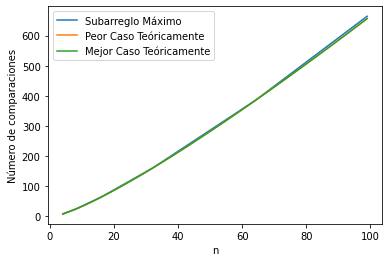

In [ ]:
import matplotlib.pyplot as plt
import math
import random

x=[n for n in range(4,100)] 
y1=[(n * math.log2(n)) for n in range(4,100)] # worst case
y2=[(n * math.log2(n)) for n in range(4,100)] # best case
y=[]; 

for n in range(4,100):
    a = random.sample(range(-100, 10000), n)
    comparaciones = 0; iteraciones = 1
    MaxSubArray(a, 0, len(a)-1)
    y.append(comparaciones)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Subarreglo Máximo", "Peor Caso Teóricamente", "Mejor Caso Teóricamente"])

## Nombre de los ejes
plt.xlabel('n')
plt.ylabel('Número de comparaciones')

# Mostrar Gráfico
plt.show()

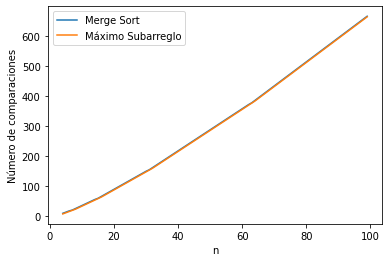

In [ ]:
import matplotlib.pyplot as plt
import math
import random

x=[n for n in range(4,100)] 
y1=[]
y=[]; 

for n in range(4,100):
    a = random.sample(range(-100, 10000), n)
    llamadas = 0; contador = 0; pasada = 0; llamadasMerge = 0; comparaciones = 0; iteraciones = 1
    MergeSort(a, 0, len(a))
    y.append(contador)
    MaxSubArray(a, 0, len(a)-1)
    y1.append(comparaciones)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Merge Sort", "Máximo Subarreglo"])

## Nombre de los ejes
plt.xlabel('n')
plt.ylabel('Número de comparaciones')

# Mostrar Gráfico
plt.show()

### **Comparación de Gráficas** (Tiempo de ejecución)

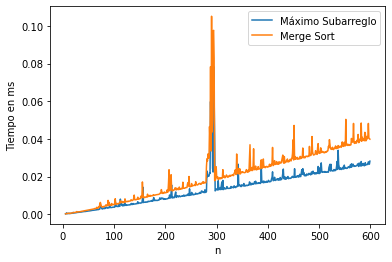

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; y1=[]

for n in range(5,600):
    a = random.sample(range(-100, 10000), n)

    llamadas = 0; contador = 0; pasada = 0; llamadasMerge = 0; comparaciones = 0; iteraciones = 1
    #la función repeat está ejecutando 10 veces MergeSort e insertionSort con el arreglo a y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({a},{0},{len(a)-1})", repeat=1, number=10)
    t1 = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a}, {0}, {len(a)})", repeat=1, number=10)

    x.append(n)
    y.append(t)
    y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Máximo Subarreglo", "Merge Sort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**

Ya sea **Merge Sort** o **Subarreglo Máximo** en este experimento, ambos son algoritmos de "Divide y Vencerás", ambos algoritmos poseen complejidad y ambos poseen complejidad $O(n*log(n))$ como su mejor y peor caso.

Ambos algoritmos realizan la misma cantidad de operaciones. Es de esperarse este resultado, pues ambos algoritmos tienen la misma complejidad, asi que deberían ser iguales sus comparaciones.

Como ambos algoritmos poseen complejidad $O(n*log(n))$ es natural suponer que sus tiempos de ejecución serian iguales. Pero al comparar sus tiempos de ejecución note que el algoritmo **Subarreglo Máximo** es más rápido que el algoritmo **Merge Sort** pese a que su complejidad sea la misma. 

Creo que esto podría deberse a la forma en que se implementa el **Merge Sort**, pues en la función **Merge** crea localmente 2 Subarreglos, mientras que **Subarreglo Máximo** a pesar de trabajar con subarreglos, solo trabaja usando índices del arreglo principal sin crear realmente subarreglos. Creo que es debido a la creación constante de subarreglos en **Merge** es la causa de que **Subarreglo Máximo** sea más rápido.